In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import torch

import seaborn as sns

from privacy_utils import get_sigma_epsilon


sns.set_style("whitegrid")

plt.rcParams['text.usetex'] = True #Let TeX do the typsetting
plt.rcParams['text.latex.preamble'] = r"""
\usepackage{sansmath}
\sansmath
""" #Force sans-serif math mode (for axes labels)
plt.rcParams['font.family'] = 'sans-serif' # ... for regular text
plt.rcParams['font.sans-serif'] = 'Helvetica, Avant Garde, Computer Modern Sans serif' # Choose a nice font here

fontsize = 15
base_path = "./data"

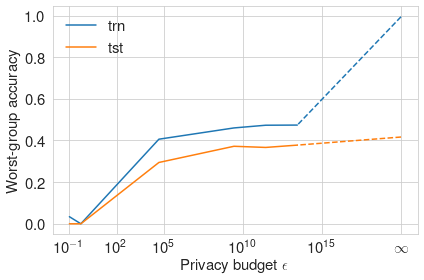

In [4]:
ds_name = "celebA"

res = joblib.load(f"data/dpdg_wgacc_{ds_name}.pkl")
epsilon, trn_wg_acc, tst_wg_acc = res['epsilon'], res['trn_wg_acc'], res['tst_wg_acc']

ticks_ = [-1, 2, 5, 10, 15, 20]
line, = plt.plot(epsilon[1:], trn_wg_acc[1:], label="trn")
plt.plot(epsilon[0: 2], trn_wg_acc[0: 2], color=line.get_color(), ls='--')
line, = plt.plot(epsilon[1:], tst_wg_acc[1:], label="tst")
plt.plot(epsilon[0: 2], tst_wg_acc[0: 2], color=line.get_color(), ls='--')
plt.xscale("log")
plt.xticks(fontsize=fontsize, ticks=[float(10**i) for i in ticks_], labels=[f"$10^{{{eps}}}$" for eps in ticks_[:-1]] + ['$\infty$'])
plt.yticks(fontsize=fontsize)
plt.xlabel("Privacy budget $\epsilon$", fontsize=fontsize)
plt.ylabel("Worst-group accuracy", fontsize=fontsize)
plt.legend(fontsize=fontsize, frameon=False)
plt.tight_layout()
plt.savefig(f"figs/dpdg_wgacc_{ds_name}.png")